# Prerequisite Tasks

## Question 1
How many multiplications and additions do you need to perform a matrix multiplication between a (n, k) and (k, m) matrix? Explain.

a. Multiplications:
for each element in the resultant matrix 'k' multiplications would be required and since there would be n*m elements total...the answer= k.n.m


b. Additions:
for each element in the resultant matrix 'k-1' additions would be required and since there would be n*m elements total...the answer= k-1.n.m

## Question 2

Write Python code to multiply the above two matrices. Solve using list of lists and then use numpy. Compare the timing of both solutions. Which one is faster? Why?

In [41]:
import numpy as np
import time

n, k, m = 3, 4, 5

mat1 = np.random.randint(0, 10, (n, k))
mat2 = np.random.randint(0, 10, (k, m))

list1 = mat1.tolist()
list2 = mat2.tolist()


start_time = time.time()
for _ in range(1000):  # Run multiple times for better timing measurement
    result = [[0 for i in range(m)] for j in range(n)]
    for i in range(n):
        for j in range(m):
            for l in range(k):
                result[i][j] += list1[i][l] * list2[l][j]
end_time = time.time()
time_lists = end_time - start_time

print(f"Time with Python lists: {time_lists:.6f} seconds (for 1000 iterations)")
print("Result using Python lists:")
print(result)

# Timing NumPy multiplication
start_time = time.time()
for _ in range(1000):  
    numpy_multi = np.matmul(mat1, mat2)
end_time = time.time()
time_numpy = end_time - start_time

print(f"\nTime with NumPy: {time_numpy:.6f} seconds (for 1000 iterations)")
print("Result using NumPy:")
print(numpy_multi)


Time with Python lists: 0.010417 seconds (for 1000 iterations)
Result using Python lists:
[[120, 144, 147, 153, 105], [130, 134, 125, 163, 115], [58, 72, 98, 88, 92]]

Time with NumPy: 0.001382 seconds (for 1000 iterations)
Result using NumPy:
[[120 144 147 153 105]
 [130 134 125 163 115]
 [ 58  72  98  88  92]]


## Question 3
Finding the highest element in a list requires one pass of the array. Finding the second highest element requires 2 passes of the the array. Using this method, what is the time complexity of finding the median of the array? Can you suggest a better method? Can you implement both these methods in Python and compare against numpy.median routine in terms of time?

In [42]:
import numpy as np
import time

# Test with different array sizes
small_array = np.array([7,3,5,6,2,1,4])
large_array = np.random.randint(1, 1000, 10000)  # Much larger array for better timing

print("=== Testing with SMALL array (7 elements) ===")
print(f"Array: {small_array}")

# Method 1: Finding the median without sorting: O(n^2)
def find_median_M1(arr):
    n = len(arr)
    arr = list(arr)  
    original_n = n
    while len(arr) > original_n//2:
        max_val = max(arr)  
        arr.remove(max_val)  
    if original_n % 2 == 0:
        median = (max_val + max(arr)) / 2  
    else:
        median = max_val
    return median

# Method 2: Sorting the array and finding the median O(n log n)
def find_median_M2(arr):
    sorted_arr = sorted(arr)  
    n = len(sorted_arr)
    if n % 2 == 0:
        median = (sorted_arr[n//2-1] + sorted_arr[n//2]) / 2
    else:
        median = sorted_arr[n//2]
    return median

# Test with small array (single execution)
Med_1 = find_median_M1(small_array)
Med_2 = find_median_M2(small_array)
Med_np = np.median(small_array)

print(f"Median using Method 1: {Med_1}")
print(f"Median using Method 2: {Med_2}")
print(f"Median using NumPy: {Med_np}")

print("\n=== Testing with LARGE array (10,000 elements) ===")

# Time with multiple iterations for better accuracy
iterations = 100

# Method 1 timing
start_time = time.time()
for _ in range(iterations):
    result1 = find_median_M1(large_array.copy())
end_time = time.time()
time_M1 = end_time - start_time

# Method 2 timing
start_time = time.time()
for _ in range(iterations):
    result2 = find_median_M2(large_array.copy())
end_time = time.time()
time_M2 = end_time - start_time

# NumPy timing
start_time = time.time()
for _ in range(iterations):
    result_np = np.median(large_array)
end_time = time.time()
time_np = end_time - start_time

print(f"Median using Method 1: {result1}")
print(f"Median using Method 2: {result2}")
print(f"Median using NumPy: {result_np}")
print(f"\nTime taken for Method 1 ({iterations} iterations): {time_M1:.6f} seconds")
print(f"Time taken for Method 2 ({iterations} iterations): {time_M2:.6f} seconds")
print(f"Time taken for NumPy ({iterations} iterations): {time_np:.6f} seconds")
print(f"\nSpeedup factor of Method 2 over Method 1: {time_M1/time_M2:.2f}x")

=== Testing with SMALL array (7 elements) ===
Array: [7 3 5 6 2 1 4]
Median using Method 1: 4
Median using Method 2: 4
Median using NumPy: 4.0

=== Testing with LARGE array (10,000 elements) ===
Median using Method 1: 499.0
Median using Method 2: 499.0
Median using NumPy: 499.0

Time taken for Method 1 (100 iterations): 62.028656 seconds
Time taken for Method 2 (100 iterations): 0.208631 seconds
Time taken for NumPy (100 iterations): 0.005986 seconds

Speedup factor of Method 2 over Method 1: 297.31x
Median using Method 1: 499.0
Median using Method 2: 499.0
Median using NumPy: 499.0

Time taken for Method 1 (100 iterations): 62.028656 seconds
Time taken for Method 2 (100 iterations): 0.208631 seconds
Time taken for NumPy (100 iterations): 0.005986 seconds

Speedup factor of Method 2 over Method 1: 297.31x


1. Method suggested above: finding the median of the array means running n/2 passes over the array in the worst case. Thus, the time complexity is $O(n^2)$ for the suggested algorithm. 

2. A better method would be to use a sorting algorithm like quicksort or mergesort and then find the median. This would take $O(nlogn)$ time.


## Question 4
What is the gradient of the following function with respect to x and y?

$$x^2y + y^3sin(x)$$

Wrt x:
$$2xy+y^3cos(x)$$
Wrt y:
$$x^2+3y^2sin(x)$$



## Question 5
Use `JAX` to confirm the gradient evaluated by your method matches the analytical solution corresponding to a few random values of x and y

In [43]:
pip install --upgrade jax jaxlib

Defaulting to user installation because normal site-packages is not writeable
Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 25.1.1 -> 25.2
[notice] To update, run: C:\Users\Admin\AppData\Local\Microsoft\WindowsApps\PythonSoftwareFoundation.Python.3.13_qbz5n2kfra8p0\python.exe -m pip install --upgrade pip


In [44]:
import jax
import jax.numpy as jnp

def f(x, y):
    return x**2 * y + y**3 * jnp.sin(x)

grad_x = jax.grad(f, argnums=0)
grad_y = jax.grad(f, argnums=1)

# Random test values
test_vals = [(1.0, 2.0), (0.5, -1.5), (2.5, 0.7)]

print("Starting gradient tests...")

for x_val, y_val in test_vals:
    # Analytical gradients
    grad_x_analytical = 2*x_val*y_val + y_val**3 * jnp.cos(x_val)
    grad_y_analytical = x_val**2 + 3*y_val**2 * jnp.sin(x_val)

    # JAX gradients
    grad_x_jax = grad_x(x_val, y_val)
    grad_y_jax = grad_y(x_val, y_val)

    print(f"\nx={x_val}, y={y_val}")
    print(f"  grad_x analytical: {grad_x_analytical:.6f}, JAX: {grad_x_jax:.6f}")
    print(f"  grad_y analytical: {grad_y_analytical:.6f}, JAX: {grad_y_jax:.6f}", flush=True)


Starting gradient tests...

x=1.0, y=2.0
  grad_x analytical: 8.322418, JAX: 8.322418
  grad_y analytical: 11.097651, JAX: 11.097651

x=0.5, y=-1.5
  grad_x analytical: -4.461841, JAX: -4.461841
  grad_y analytical: 3.486122, JAX: 3.486122

x=0.5, y=-1.5
  grad_x analytical: -4.461841, JAX: -4.461841
  grad_y analytical: 3.486122, JAX: 3.486122



x=2.5, y=0.7
  grad_x analytical: 3.225208, JAX: 3.225208
  grad_y analytical: 7.129754, JAX: 7.129754


## Question 6  
Use `sympy` to confirm that you obtain the same gradient analytically.

In [45]:
import sympy as sym

x, y = sym.symbols('x y')
f = (x**2)*y + (y**3)*sym.sin(x)
print(sym.diff(f, x))
print(sym.diff(f, y))

2*x*y + y**3*cos(x)
x**2 + 3*y**2*sin(x)


## Question 7

Create a Python nested dictionary to represent hierarchical information. We want to store record of students and their marks. Something like:

In [46]:
students_data = {
    '2022': {
        'Branch 1': {
            'Roll No': 1,
            'Name': 'Shivraj',
            'Marks': {'Maths': 88, 'Physics': 82, 'Chemistry': 79}
        },
        'Branch 2': {
            'Roll No': 2,
            'Name': 'Dhruv',
            'Marks': {'Maths': 85, 'Physics': 80, 'Chemistry': 78}
        }
    },
    '2023': {
        'Branch 1': {
            'Roll No': 1,
            'Name': 'Shivraj',
            'Marks': {'Maths': 90, 'Physics': 84, 'Chemistry': 81}
        },
        'Branch 2': {
            'Roll No': 2,
            'Name': 'Dhruv',
            'Marks': {'Maths': 87, 'Physics': 82, 'Chemistry': 79}
        }
    },
    '2024': {
        'Branch 1': {
            'Roll No': 1,
            'Name': 'Shivraj',
            'Marks': {'Maths': 91, 'Physics': 85, 'Chemistry': 83}
        },
        'Branch 2': {
            'Roll No': 2,
            'Name': 'Dhruv',
            'Marks': {'Maths': 89, 'Physics': 84, 'Chemistry': 80}
        }
    },
    '2025': {
        'Branch 1': {
            'Roll No': 1,
            'Name': 'Shivraj',
            'Marks': {'Maths': 93, 'Physics': 86, 'Chemistry': 84}
        },
        'Branch 2': {
            'Roll No': 2,
            'Name': 'Dhruv',
            'Marks': {'Maths': 90, 'Physics': 85, 'Chemistry': 82}
        }
    }
}


## Question 8

Store the same information using Python classes. We have an overall database which is a list of year objects. Each year contains a list of branches. Each branch contains a list of students. Each student has some properties like name, roll number and has marks in some subjects.

In [47]:
class Year:
    def __init__(self, year, branch_list):
        self.year = year
        self.branch_list = branch_list

class Branch:
    def __init__(self, branch_name, student_list):
        self.branch_name = branch_name
        self.student_list = student_list

class Student:
    def __init__(self, roll_no, name, marks: dict):
        self.roll_no = roll_no
        self.name = name
        self.marks = marks

database = []

# Data for each year
data_by_year = {
    2022: [
        ("Branch 1", Student(1, "Shivraj", {'Maths': 88, 'Physics': 82, 'Chemistry': 79})),
        ("Branch 2", Student(2, "Dhruv", {'Maths': 85, 'Physics': 80, 'Chemistry': 78}))
    ],
    2023: [
        ("Branch 1", Student(1, "Shivraj", {'Maths': 90, 'Physics': 84, 'Chemistry': 81})),
        ("Branch 2", Student(2, "Dhruv", {'Maths': 87, 'Physics': 82, 'Chemistry': 79}))
    ],
    2024: [
        ("Branch 1", Student(1, "Shivraj", {'Maths': 91, 'Physics': 85, 'Chemistry': 83})),
        ("Branch 2", Student(2, "Dhruv", {'Maths': 89, 'Physics': 84, 'Chemistry': 80}))
    ],
    2025: [
        ("Branch 1", Student(1, "Shivraj", {'Maths': 93, 'Physics': 86, 'Chemistry': 84})),
        ("Branch 2", Student(2, "Dhruv", {'Maths': 90, 'Physics': 85, 'Chemistry': 82}))
    ]
}

# Build the database
for year, branches in data_by_year.items():
    branch_list = []
    for branch_name, student in branches:
        branch_list.append(Branch(branch_name, [student]))
    database.append(Year(year, branch_list))


In [48]:
def print_database(database):
    for year_obj in database:
        print(f"Year: {year_obj.year}")
        for branch_obj in year_obj.branch_list:
            print(f"  Branch: {branch_obj.branch_name}")
            for student in branch_obj.student_list:
                print(f"    Roll No: {student.roll_no}")
                print(f"    Name: {student.name}")
                print("    Marks:")
                for subject, mark in student.marks.items():
                    print(f"      {subject}: {mark}")
        print("-" * 40)  

print_database(database)


Year: 2022
  Branch: Branch 1
    Roll No: 1
    Name: Shivraj
    Marks:
      Maths: 88
      Physics: 82
      Chemistry: 79
  Branch: Branch 2
    Roll No: 2
    Name: Dhruv
    Marks:
      Maths: 85
      Physics: 80
      Chemistry: 78
----------------------------------------
Year: 2023
  Branch: Branch 1
    Roll No: 1
    Name: Shivraj
    Marks:
      Maths: 90
      Physics: 84
      Chemistry: 81
  Branch: Branch 2
    Roll No: 2
    Name: Dhruv
    Marks:
      Maths: 87
      Physics: 82
      Chemistry: 79
----------------------------------------
Year: 2024
  Branch: Branch 1
    Roll No: 1
    Name: Shivraj
    Marks:
      Maths: 91
      Physics: 85
      Chemistry: 83
  Branch: Branch 2
    Roll No: 2
    Name: Dhruv
    Marks:
      Maths: 89
      Physics: 84
      Chemistry: 80
----------------------------------------
Year: 2025
  Branch: Branch 1
    Roll No: 1
    Name: Shivraj
    Marks:
      Maths: 93
      Physics: 86
      Chemistry: 84
  Branch: Branch 2
 

## Question 9

Using matplotlib plot the following functions on the domain: x = 0.5 to 100.0 in steps of 0.5.

1. $y = x^1$
2. $y = x^2$
2. $y = \dfrac{x^3}{100}$
4. $y = sin(x)$
5. $y = \dfrac{sin(x)}{x}$
6. $y = log(x)$
7. $y = e^x$

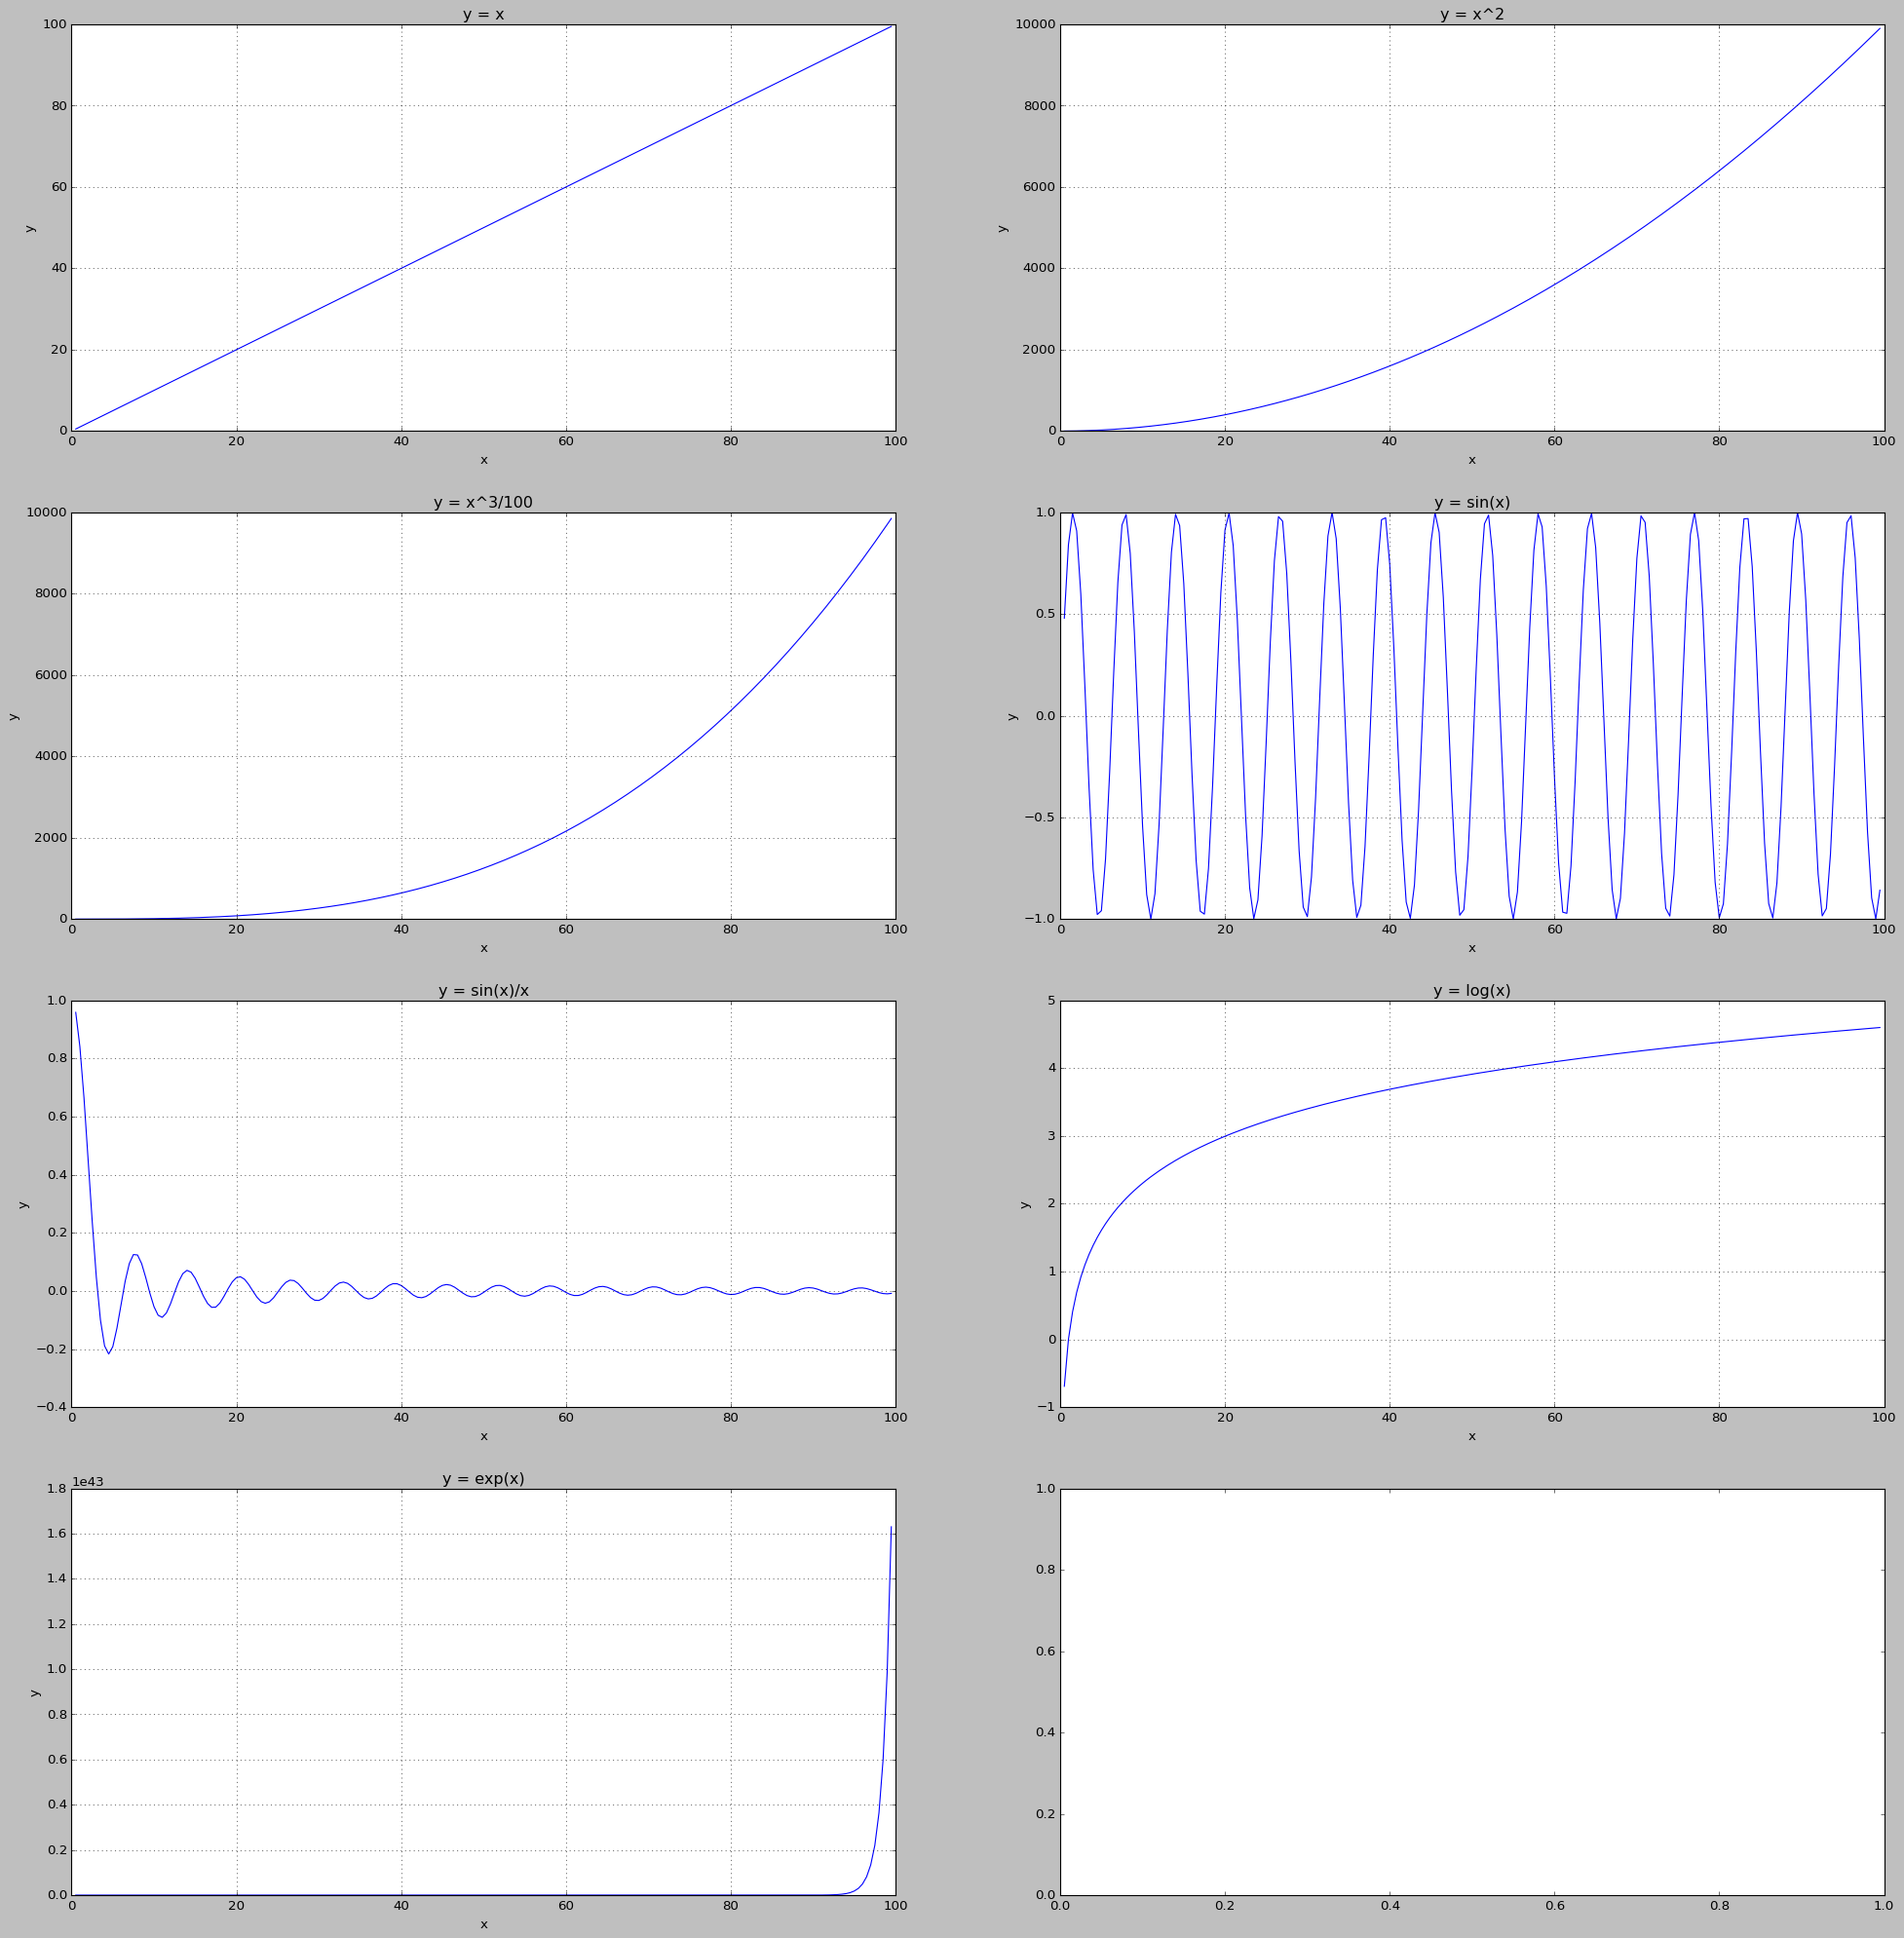

In [49]:
import numpy as np
import matplotlib.pyplot as plt

x = np.arange(0.5, 100, 0.5)

fig, ax = plt.subplots(nrows=4, ncols=2, figsize=(30, 30))
fn1 = lambda x: x
fn2 = lambda x: x**2
fn3 = lambda x: x**3/100
fn4 = lambda x: np.sin(x)
fn5 = lambda x: np.sin(x)/x
fn6 = lambda x: np.log(x)
fn7 = lambda x: np.exp(x)

plt.style.use('classic')
ax[0, 0].plot(x, fn1(x))
ax[0, 0].set(xlabel='x', ylabel='y', title='y = x')
ax[0, 0].grid()
ax[0, 1].plot(x, fn2(x))
ax[0, 1].set(xlabel='x', ylabel='y', title='y = x^2')
ax[0, 1].grid()
ax[1, 0].plot(x, fn3(x))
ax[1, 0].set(xlabel='x', ylabel='y', title='y = x^3/100')
ax[1, 0].grid()
ax[1, 1].plot(x, fn4(x))
ax[1, 1].set(xlabel='x', ylabel='y', title='y = sin(x)')
ax[1, 1].grid()
ax[2, 0].plot(x, fn5(x))
ax[2, 0].set(xlabel='x', ylabel='y', title='y = sin(x)/x')
ax[2, 0].grid()
ax[2, 1].plot(x, fn6(x))
ax[2, 1].set(xlabel='x', ylabel='y', title='y = log(x)')
ax[2, 1].grid()
ax[3, 0].plot(x, fn7(x))
ax[3, 0].set(xlabel='x', ylabel='y', title='y = exp(x)')
ax[3, 0].grid()


## Question 10

Using numpy generate a matrix of size `20X5` containing random numbers drawn uniformly from the range of 1 to 2. Using Pandas create a dataframe out of this matrix. Name the columns of the dataframe as “a”, “b”, “c”, “d”, “e”. Find the column with the highest standard deviation. Find the row with the lowest mean.

In [50]:
import numpy as np
import pandas as pd

df = pd.DataFrame(np.random.rand(20, 5)+1, columns=['a', 'b', 'c', 'd', 'e'])
std_deviation = df.std()
mean = df.mean()

print("The standard deviation of each column in the dataframe is:")
print(std_deviation)
print(f"\nThe column with the highest standard deviation is {std_deviation.idxmax()}\n")
print("The mean of each column in the dataframe is:")
print(mean)
print(f"\nThe column with the highest mean is {mean.idxmax()}")


The standard deviation of each column in the dataframe is:
a    0.323885
b    0.284867
c    0.292201
d    0.321541
e    0.262593
dtype: float64

The column with the highest standard deviation is a

The mean of each column in the dataframe is:
a    1.467446
b    1.457322
c    1.495942
d    1.444675
e    1.608549
dtype: float64

The column with the highest mean is e


## Question 11

Add a new column to the dataframe called “f” which is the sum of the columns “a”, “b”, “c”, “d”, “e”. Create another column called “g”. The value in the column “g” should be “LT8” if the value in the column “f” is less than 8 and “GT8” otherwise. Find the number of rows in the dataframe where the value in the column “g” is “LT8”. Find the standard deviation of the column “f” for the rows where the value in the column “g” is “LT8” and “GT8” respectively.

In [51]:
df['f'] = df.loc[:, ['a', 'b', 'c', 'd', 'e']].sum(axis=1)
df['g'] = pd.Series(["LT8" if df['f'].iloc[i]<8 else "GT8" for i in range(len(df))])

print(f"The number of rows in the dataframe where the value in the column g is 'LT8' is {df.value_counts('g')['LT8']}")
df

The number of rows in the dataframe where the value in the column g is 'LT8' is 14


,a,b,c,d,e,f,g
0,1.263501,1.364092,1.676104,1.025118,1.473106,6.801921,LT8
1,1.974111,1.867847,1.055885,1.778713,1.926840,8.603397,GT8
2,1.956485,1.295436,1.916644,1.301074,1.275246,7.744885,LT8
3,1.357421,1.778120,1.634671,2.000000,1.803708,8.573919,GT8
4,1.497947,1.681490,1.572396,1.253908,1.933559,7.939299,LT8
5,1.105836,1.376519,1.504786,1.721260,1.200461,6.908860,LT8
6,1.991183,1.112204,1.665998,1.898742,1.718908,8.387035,GT8
7,1.478217,1.202349,1.680667,1.111744,1.362226,6.835203,LT8
8,1.466916,1.796871,1.311270,1.415423,1.501714,7.492193,LT8
9,1.779848,1.608291,1.847770,1.637080,1.563966,8.436956,GT8


## Question 12

Write a small piece of code to explain broadcasting in numpy.

In [52]:
import numpy as np

a = np.array([1, 2, 3])

b = np.array([[10],
              [20],
              [30]])

result = a + b

print("a shape:", a.shape)
print(a)
print("b shape:", b.shape)
print(b)
print("result shape:", result.shape)
print(result)


a shape: (3,)
[1 2 3]
b shape: (3, 1)
[[10]
 [20]
 [30]]
result shape: (3, 3)
[[11 12 13]
 [21 22 23]
 [31 32 33]]


## Question 13

Write a function to compute the `argmin` of a numpy array. The function should take a numpy array as input and return the index of the minimum element. You can use the `np.argmin` function to verify your solution.

In [53]:
import numpy as np

random_array = np.random.randint(0, 100, 10)

def custom_argmin(array):
    argmin = 0
    for i in range(len(array)):
        if array[i] < array[argmin]:
            argmin = i
    return argmin

print(f"The array is {random_array}")
print(f"The index of the minimum value in the array with the custom function is {custom_argmin(random_array)}")
print(f"The index of the minimum value in the array with the numpy function is {np.argmin(random_array)}")

The array is [29  8 50 11 58 53 61 17 17 28]
The index of the minimum value in the array with the custom function is 1
The index of the minimum value in the array with the numpy function is 1
